## 讀檔案，載入資料

In [2]:
import json
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return {item['cuisine_id']: item for item in json.load(f)}

gt_file = 'ground_truth.json'
gpt_file = 'response_gpt.json'
gemini_file = 'response_gemini.json'
claude_file = 'response_claude.json'

gt_data = load_json(gt_file)
gpt_data = load_json(gpt_file)
gemini_data = load_json(gemini_file)
claude_data = load_json(claude_file)

print(gt_data)
print(gpt_data)
print(gemini_data)
print(claude_data)

{1: {'cuisine_id': 1, 'cuisine_url': 'https://icook.tw/recipes/455986', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '五花肉', 'amount': '2000', 'unit': '克'}, {'ingredient': '洋蔥', 'amount': '2', 'unit': '顆'}, {'ingredient': '紅蔥頭末', 'amount': '50', 'unit': '克'}, {'ingredient': '蒜末', 'amount': '50', 'unit': '克'}, {'ingredient': '五香粉', 'amount': '1', 'unit': '小匙'}, {'ingredient': '醬油', 'amount': '1', 'unit': '杯'}, {'ingredient': '油膏', 'amount': '0.5', 'unit': '杯'}, {'ingredient': '紹興酒', 'amount': '4', 'unit': '大匙'}, {'ingredient': '冰糖', 'amount': '50', 'unit': '克'}], 'cooking_instructions': '洋蔥切絲或丁。五花肉切細條。大蒜壓成泥或切末。紅蔥頭可以用紅蔥酥代替。先放部分的肉下鍋煎出油來。肉取出備用。將砂糖或冰糖下鍋，用煎肉的油炒至咖啡色。大約深金黃色就可以先熄火了。加入醬油，油膏。加入蒜泥、五香粉、洋蔥與加入紹興酒拌勻同煮，沒有紹興也可以加米酒。加入所有的五花肉拌炒均勻。加入800ml的水。開大火煮滾，改中小火煮兩個小時。', 'quantity': 10}, 2: {'cuisine_id': 2, 'cuisine_url': 'https://icook.tw/recipes/391516', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '豬五花肉', 'amount': '1000', 'unit': '克'}, {'ingredient': '蒜頭', 'amount': '3', 'unit': '

## 資料整理

### ingredients 變成 sentence 

In [3]:
# {id:" ", ing:" "}
gt_ing_sentence_dic = {}
gpt_ing_sentence_dic = {}
gemini_ing_sentence_dic = {}
claude_ing_sentence_dic = {}

def ingredients_to_sentence (data):
    ing_sentence = {}
    for item in data:
        sentence = ""
        for ingredient_list in data[item]['ingredients']:
            sentence = sentence + ingredient_list['ingredient'] + " "
        ing_sentence[item] = sentence
    return ing_sentence

gt_ing_sentence_dic = ingredients_to_sentence(gt_data)
gpt_ing_sentence_dic = ingredients_to_sentence(gpt_data)
gemini_ing_sentence_dic = ingredients_to_sentence(gemini_data)
claude_ing_sentence_dic = ingredients_to_sentence(claude_data)

### Instruction 變成 sentence

In [4]:
# {id:" ", instrc:" "}
gt_instrc_sentence_dic = {}
gpt_instrc_sentence_dic = {}
gemini_instrc_sentence_dic = {}
claude_instrc_sentence_dic = {}

def instructions_to_sentence (data):
    print(data)
    instrc_sentence = {}
    for item in data:
        print(data[item]['cooking_instructions'])
        instrc_sentence[item] = data[item]['cooking_instructions']
    return instrc_sentence

gt_instrc_sentence_dic = instructions_to_sentence(gt_data)
gpt_instrc_sentence_dic = instructions_to_sentence(gpt_data)
gemini_instrc_sentence_dic = instructions_to_sentence(gemini_data)
claude_instrc_sentence_dic = instructions_to_sentence(claude_data)


{1: {'cuisine_id': 1, 'cuisine_url': 'https://icook.tw/recipes/455986', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '五花肉', 'amount': '2000', 'unit': '克'}, {'ingredient': '洋蔥', 'amount': '2', 'unit': '顆'}, {'ingredient': '紅蔥頭末', 'amount': '50', 'unit': '克'}, {'ingredient': '蒜末', 'amount': '50', 'unit': '克'}, {'ingredient': '五香粉', 'amount': '1', 'unit': '小匙'}, {'ingredient': '醬油', 'amount': '1', 'unit': '杯'}, {'ingredient': '油膏', 'amount': '0.5', 'unit': '杯'}, {'ingredient': '紹興酒', 'amount': '4', 'unit': '大匙'}, {'ingredient': '冰糖', 'amount': '50', 'unit': '克'}], 'cooking_instructions': '洋蔥切絲或丁。五花肉切細條。大蒜壓成泥或切末。紅蔥頭可以用紅蔥酥代替。先放部分的肉下鍋煎出油來。肉取出備用。將砂糖或冰糖下鍋，用煎肉的油炒至咖啡色。大約深金黃色就可以先熄火了。加入醬油，油膏。加入蒜泥、五香粉、洋蔥與加入紹興酒拌勻同煮，沒有紹興也可以加米酒。加入所有的五花肉拌炒均勻。加入800ml的水。開大火煮滾，改中小火煮兩個小時。', 'quantity': 10}, 2: {'cuisine_id': 2, 'cuisine_url': 'https://icook.tw/recipes/391516', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '豬五花肉', 'amount': '1000', 'unit': '克'}, {'ingredient': '蒜頭', 'amount': '3', 'unit': '

## 食材種類正確性

### bert_base_chinese

In [5]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F


In [6]:
gpt_ing_bert_base_chinese = []
gemini_ing_bert_base_chinese = []
claude_ing_bert_base_chinese = []

def bert_base_chinese_for_ing_sentence(gt_ing_sentence, model_ing_sentence):
    print(gt_ing_sentence)
    print(model_ing_sentence)
    
    tokenizer = AutoTokenizer.from_pretrained("bert-base-chinese")
    model = AutoModel.from_pretrained("bert-base-chinese")


    inputs = tokenizer(gt_ing_sentence, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    gt_embedding = outputs.last_hidden_state[:, 0, :]  # shape: [1, hidden_size]

    inputs = tokenizer(model_ing_sentence, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    model_embedding = outputs.last_hidden_state[:, 0, :]  # shape: [1, hidden_size]
        
    # 計算餘弦相似度（值域 -1 到 1，越接近 1 越相似）
    similarity = F.cosine_similarity(gt_embedding, model_embedding)
    print(f"相似度: {similarity.item():.4f}")
    return similarity.item()

def get_ing_bert_base_chinese(gt_ing_sentence_dic, model_ing_sentence_dic):
    ing_bert_base_chinese = []
    for gt_id, model_id in zip(gt_ing_sentence_dic, model_ing_sentence_dic):
        sentence1 = gt_ing_sentence_dic[gt_id]
        sentence2 = model_ing_sentence_dic[model_id]
        print(sentence1)
        print(sentence2)
        ing_bert_base_chinese.append(bert_base_chinese_for_ing_sentence(sentence1, sentence2))
    return ing_bert_base_chinese

gpt_ing_bert_base_chinese = get_ing_bert_base_chinese(gt_ing_sentence_dic, gpt_ing_sentence_dic)
gemini_ing_bert_base_chinese = get_ing_bert_base_chinese(gt_ing_sentence_dic, gemini_ing_sentence_dic)
claude_ing_bert_base_chinese = get_ing_bert_base_chinese(gt_ing_sentence_dic, claude_ing_sentence_dic)

print(f'gpt_ing_bert_base_chinese = {gpt_ing_bert_base_chinese}')
print(f'gemini_ing_bert_base_chinese = {gemini_ing_bert_base_chinese}')
print(f'claude_ing_bert_base_chinese = {claude_ing_bert_base_chinese}')

五花肉 洋蔥 紅蔥頭末 蒜末 五香粉 醬油 油膏 紹興酒 冰糖 
五花肉 紅蔥頭 蒜頭 醬油 米酒 冰糖 白胡椒粉 水 滷蛋（可選） 白飯 
五花肉 洋蔥 紅蔥頭末 蒜末 五香粉 醬油 油膏 紹興酒 冰糖 
五花肉 紅蔥頭 蒜頭 醬油 米酒 冰糖 白胡椒粉 水 滷蛋（可選） 白飯 
相似度: 0.9128
豬五花肉 蒜頭 米酒 冰糖 五香粉 香葉 紅蔥頭 醬油 黑糖 白胡椒粉 八角 
五花肉 紅蔥頭 蒜頭 醬油 冰糖 米酒 水 五香粉 白胡椒粉 滷蛋 小黃瓜 白飯 
豬五花肉 蒜頭 米酒 冰糖 五香粉 香葉 紅蔥頭 醬油 黑糖 白胡椒粉 八角 
五花肉 紅蔥頭 蒜頭 醬油 冰糖 米酒 水 五香粉 白胡椒粉 滷蛋 小黃瓜 白飯 
相似度: 0.9475
五花肉 紅蔥頭 蒜頭 冰糖 豬油 熱水 紹興酒 醬油 水 五香粉 白糊椒粉 糖 
五花肉 紅蔥頭 蒜頭 醬油 冰糖 米酒 水 五香粉 滷蛋 白飯 
五花肉 紅蔥頭 蒜頭 冰糖 豬油 熱水 紹興酒 醬油 水 五香粉 白糊椒粉 糖 
五花肉 紅蔥頭 蒜頭 醬油 冰糖 米酒 水 五香粉 滷蛋 白飯 
相似度: 0.9029
豬絞肉 醬油 油蔥酥 紹興酒 冰糖 水 
絞肉（豬肉） 乾香菇 紅蔥頭 蒜頭 醬油 冰糖 米酒 五香粉 水 白飯 
豬絞肉 醬油 油蔥酥 紹興酒 冰糖 水 
絞肉（豬肉） 乾香菇 紅蔥頭 蒜頭 醬油 冰糖 米酒 五香粉 水 白飯 
相似度: 0.9113
五花肉 小洋蔥 蒜末 油蔥酥 醬油 米酒 冰糖 麥芽糖 五香粉 
五花肉 紅蔥頭 蒜頭 老抽 生抽（醬油） 冰糖 米酒 白胡椒粉 八角 水 白飯 
五花肉 小洋蔥 蒜末 油蔥酥 醬油 米酒 冰糖 麥芽糖 五香粉 
五花肉 紅蔥頭 蒜頭 老抽 生抽（醬油） 冰糖 米酒 白胡椒粉 八角 水 白飯 
相似度: 0.9221
雞胸 地瓜粉 醬油 大蒜油 果糖 鹹酥雞粉 
雞腿肉或雞胸肉 蒜末 醬油 米酒 黑胡椒粉 鹽 蛋液 太白粉或玉米粉 麵包粉 食用油 
雞胸 地瓜粉 醬油 大蒜油 果糖 鹹酥雞粉 
雞腿肉或雞胸肉 蒜末 醬油 米酒 黑胡椒粉 鹽 蛋液 太白粉或玉米粉 麵包粉 食用油 
相似度: 0.9200
雞柳肉 白胡椒粉 醬油 地瓜粉 
雞胸肉 醬油 米酒 蒜末 五香粉 白胡椒粉 糖 地瓜粉 九層塔（可選） 食用油 
雞柳肉 白胡椒粉 醬油 地瓜粉 
雞

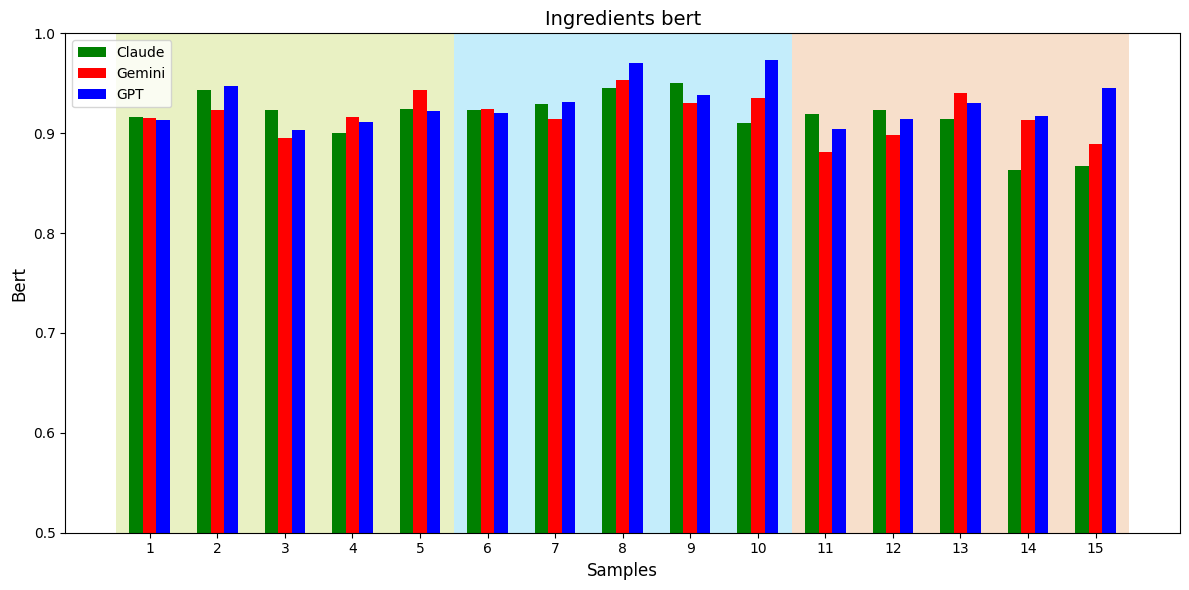

In [7]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)

# 畫長條圖
ax.bar(x3, claude_ing_bert_base_chinese, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_ing_bert_base_chinese, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_ing_bert_base_chinese, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('Bert', fontsize=12)
ax.set_title('Ingredients bert', fontsize=14)
ax.set_ylim(0.5, 1.0)

plt.tight_layout()
plt.savefig('ing_bert.png')

## Cooking Instructions

### bert_base_chinese

In [ ]:
gpt_instrc_bert_base_chinese = []
gemini_instrc_bert_base_chinese = []
claude_instrc_bert_base_chinese = []

def bert_base_chinese_for_instrc_sentence(gt_instrc_sentence, model_instrc_sentence):
    #print(gt_instrc_sentence)
    #print(model_instrc_sentence)
    
    tokenizer = AutoTokenizer.from_pretrained("bert-base-chinese")
    model = AutoModel.from_pretrained("bert-base-chinese")


    inputs = tokenizer(gt_instrc_sentence, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    gt_embeddinstrc = outputs.last_hidden_state[:, 0, :]  # shape: [1, hidden_size]

    inputs = tokenizer(model_instrc_sentence, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    model_embeddinstrc = outputs.last_hidden_state[:, 0, :]  # shape: [1, hidden_size]
        
    # 計算餘弦相似度（值域 -1 到 1，越接近 1 越相似）
    similarity = F.cosine_similarity(gt_embeddinstrc, model_embeddinstrc)
    print(f"{similarity.item():.4f}")
    return similarity.item()

def get_instrc_bert_base_chinese(gt_instrc_sentence_dic, model_instrc_sentence_dic):
    instrc_bert_base_chinese = []
    for gt_id, model_id in zip(gt_instrc_sentence_dic, model_instrc_sentence_dic):
        sentence1 = gt_instrc_sentence_dic[gt_id]
        sentence2 = model_instrc_sentence_dic[model_id]
        #print(sentence1)
        #print(sentence2)
        instrc_bert_base_chinese.append(bert_base_chinese_for_instrc_sentence(sentence1, sentence2))
    return instrc_bert_base_chinese

gpt_ing_bert_base_chinese = get_instrc_bert_base_chinese(gt_instrc_sentence_dic, gpt_instrc_sentence_dic)
gemini_ing_bert_base_chinese = get_instrc_bert_base_chinese(gt_instrc_sentence_dic, gemini_instrc_sentence_dic)
claude_ing_bert_base_chinese = get_instrc_bert_base_chinese(gt_instrc_sentence_dic, claude_instrc_sentence_dic)

print(f'gpt_instrc_bert_base_chinese = {gpt_instrc_bert_base_chinese}')
print(f'gemini_instrc_bert_base_chinese = {gemini_instrc_bert_base_chinese}')
print(f'claude_instrc_bert_base_chinese = {claude_instrc_bert_base_chinese}')

0.9131
0.8891
0.8251
0.8753
0.9129
0.9639
0.9229
0.9107
0.8904
0.9181
0.9268
0.9702
0.8851
0.8164
0.9514
0.9439
0.8995
0.8646
0.8592
0.9045
0.9503
0.9137
0.9162
0.8864
0.9063
0.9190
0.9559
0.8804
0.8277
0.9208
0.9283
0.9373
0.8971
0.8729
0.9104
0.9522
0.9146
0.9233
0.8905
0.9020
0.8742
0.9611
0.8532
0.8205
0.8681
gpt_instrc_bert_base_chinese = [0.9131244421005249, 0.8890540599822998, 0.8251231908798218, 0.8753093481063843, 0.9128513336181641, 0.963862419128418, 0.9229490756988525, 0.910729706287384, 0.8903659582138062, 0.9181256294250488, 0.9267808198928833, 0.9701708555221558, 0.8850594162940979, 0.8163639903068542, 0.9514017105102539]
gemini_instrc_bert_base_chinese = [0.9439057111740112, 0.8994565010070801, 0.8646305799484253, 0.8592066168785095, 0.9044826626777649, 0.9503000974655151, 0.9136605262756348, 0.9161821603775024, 0.8864332437515259, 0.906261682510376, 0.919021487236023, 0.9558723568916321, 0.8803504705429077, 0.8276716470718384, 0.9208296537399292]
claude_instrc_bert_bas

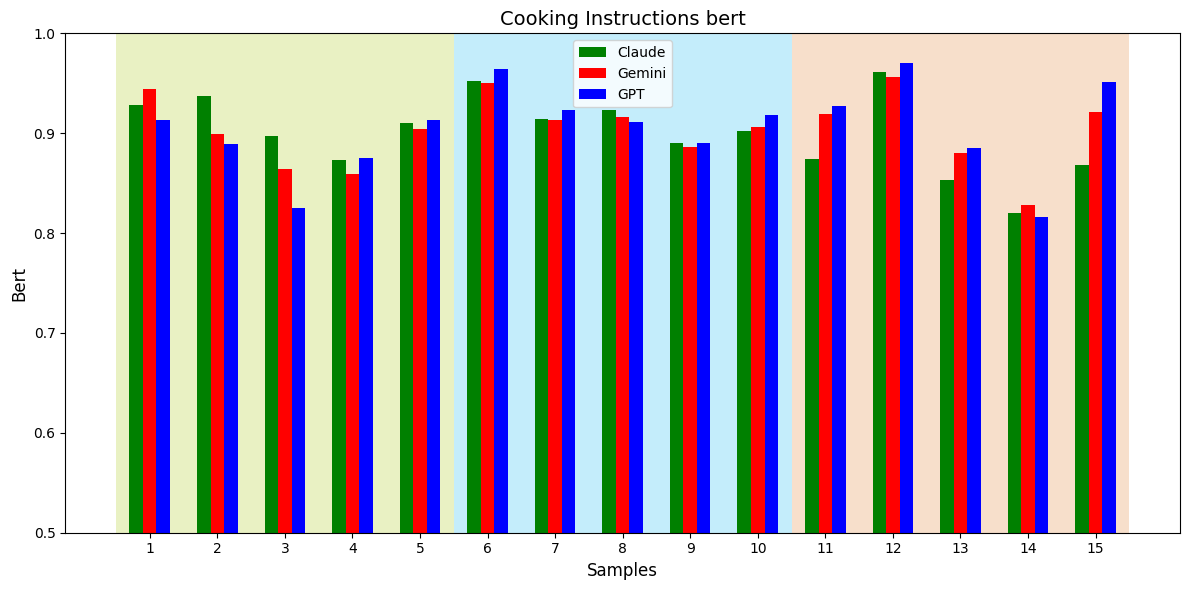

In [ ]:
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)

# 畫長條圖
ax.bar(x3, claude_instrc_bert_base_chinese, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_instrc_bert_base_chinese, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_instrc_bert_base_chinese, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('Bert', fontsize=12)
ax.set_title('Cooking Instructions bert', fontsize=14)
ax.set_ylim(0.5, 1.0)

plt.tight_layout()
plt.savefig('instrc_bert.png')